# Face Recognition Using FaceNet

In [2]:
from keras_facenet import FaceNet
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
model = FaceNet()

In [35]:
def img_to_encoding(img):
    #img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img = np.around(np.array(img) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.model.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

In [36]:
def recognition(img, data, model):
    encoding =  img_to_encoding(img)
    min_dist = 100
    for (name, db_enc) in data.items():
        dist = np.linalg.norm((encoding-db_enc))
        if dist<min_dist:
            min_dist = dist
            identity = name
    if min_dist > 0.7:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

In [97]:
def get_face_from_image(image_path):
    img = cv2.imread(image_path)
    height, width = img.shape[:2]
    new_width = 640
    new_height = int(new_width * height / width)
    img = cv2.resize(img, (new_width, new_height))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(face_cascade)
    if face_cascade.empty():
        print("Error loading face detection model.")
    else:
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
        if len(faces) == 0:
            print("No faces found in the image.")
        else:
            (x, y, w, h) = faces[0]
            face_img = img[y:y+h, x:x+w]
            #Display the original image and the extracted face
            fig, ax = plt.subplots(1, 2, figsize=(10,5))
            ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax[1].imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
            plt.show()
            return face_img
            


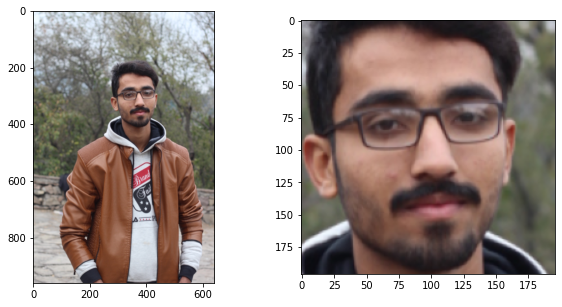

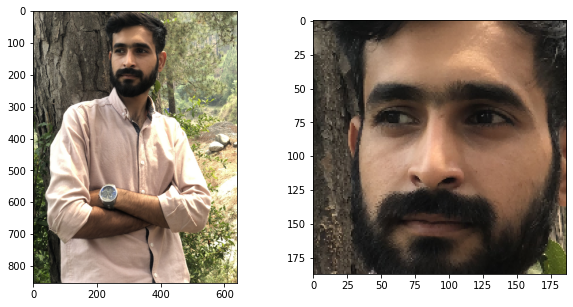

In [98]:
import warnings
warnings.filterwarnings('ignore')
face_img = get_face_from_image('G:/Iphone/IMG_0717.JPG')
osama_face_img = get_face_from_image('G:/Iphone/Noori Waterfall/IMG_0732.JPG')
data["Sami"] = img_to_encoding(face_img)
data["Osama"] = img_to_encoding(osama_face_img)

Testing..


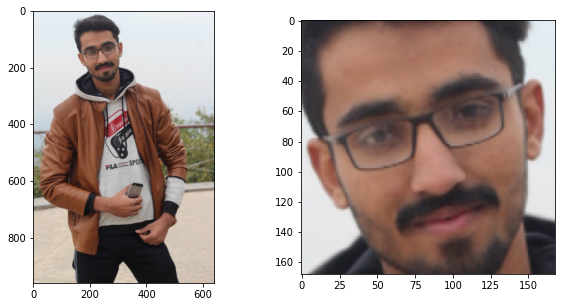

it's Sami, the distance is 0.6277083


(0.6277083, 'Sami')

In [114]:
print('Testing..')
face_img1 = get_face_from_image('G:/Iphone/IMG_0716.JPG')
recognition(face_img1, data,  embedder.model)

# Face Recognition Using face_recognition

In [64]:
import face_recognition 

In [76]:
img = face_recognition.load_image_file('G:/Tensorflow/IMG_E0717.JPG')

In [78]:
abdul_sami_face_encodings=face_recognition.face_encodings(img)

In [115]:
img = cv2.imread('G:/Iphone/IMG_0716.JPG')
height, width = img.shape[:2]
new_width = 640
new_height = int(new_width * height / width)
img = cv2.resize(img, (new_width, new_height))
test_face_encodings = face_recognition.face_encodings(img)

[0.30007867]
Abdul Sami Face Found


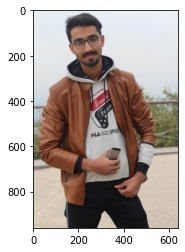

In [116]:
for face_encoding in test_face_encodings:
    print(np.linalg.norm(abdul_sami_face_encodings - face_encoding, axis=1))
    matches = face_recognition.compare_faces(abdul_sami_face_encodings,face_encoding)
    if True in matches:
        print('Abdul Sami Face Found')
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))